In [50]:
from keras.models import load_model
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np

### Functions
---

In [7]:
def metrics(model, x_test):
    y_pred = np.argmax(model.predict(x_test), axis=-1) 
    y_true = np.argmax(y_test, axis=-1) 

    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovr')

    print('Accuracy: ', acc)
    print('Precision: ', recall)
    print('Recall: ', precision)
    print('F1-score: ', f1)
    print('AUC: ', auc)

    return acc, recall, precision, f1, auc

def cm(model, model_name, x_test):
    font = {'size': 16}
    labels = ['Normal', 'DoS']

    y_pred = np.argmax(model.predict(x_test), axis=-1) 
    y_true = np.argmax(y_test, axis=-1) 

    confusion = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(confusion, annot=True, linewidths=0.8, xticklabels=labels, yticklabels=labels, fmt='d', cmap='Blues')

    plt.title(f'{model_name} - Simulated Data', fontsize=20) 
    plt.xlabel('Predicted', fontdict=font)
    plt.ylabel('True', fontdict=font)

    plt.savefig(f'img/models/{model_name}', bbox_inches="tight") 

### ANN Model
---

In [3]:
ann = load_model('trained_models/ann')

In [ ]:
acc_ann, recall_ann, precision_ann, f1_ann, auc_ann = metrics(ann, x_test)

In [ ]:
cm(ann, 'ANN', x_test)

### DNN Model
---

In [4]:
dnn = load_model('trained_models/dnn')

In [ ]:
acc_dnn, recall_dnn, precision_dnn, f1_dnn, auc_dnn = metrics(dnn, x_test)

In [ ]:
cm(dnn, 'DNN', x_test)

### Custom Model
---

In [5]:
custom = load_model('trained_models/custom')

In [ ]:
acc_custom, recall_custom, precision_custom, f1_custom, auc_custom = metrics(custom, x_test)

In [ ]:
cm(custom, 'Custom', x_test)

### Comparion Performance
---

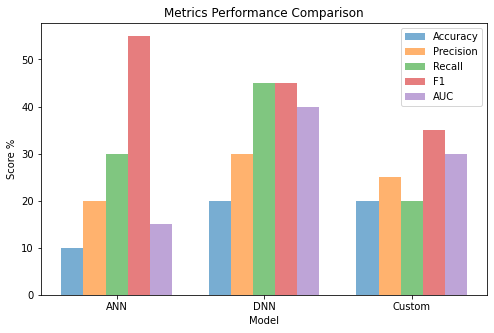

In [59]:
#Bar plot, dummy values for now
models = ['ANN','DNN','Custom']
acc = [10,20,20]
prec = [20,30,25]
rec = [30,45,20]
f1 = [55,45,35]
auc = [15,40,30]

offset = 0.15
width = 0.15
  
x_axis = np.arange(len(models))
  
plt.figure(figsize=(8, 5))
plt.bar(x_axis, acc, width, label = 'Accuracy', alpha=0.6)
plt.bar(x_axis+offset, prec, width, label = 'Precision', alpha=0.6)
plt.bar(x_axis+offset*2, rec, width, label = 'Recall', alpha=0.6)
plt.bar(x_axis+offset*3, f1, width, label = 'F1', alpha=0.6)
plt.bar(x_axis+offset*4, auc, width, label = 'AUC', alpha=0.6)

plt.xticks(x_axis+width*2, models)
plt.xlabel('Model')
plt.ylabel('Score %')
plt.title('Metrics Performance Comparison')
plt.legend()
plt.show()